# Nripesh Kumar

## GRIP Task 5: To explore Business Analytics

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
file = "SampleSuperstore.csv"
df = pd.read_csv(file,error_bad_lines=False)
data = df
print(data.head(5))

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

### I have assumed that the objective of the company is to increase Profit and I will be determining the attributes that affect Profit the most in order to advise the company to make informed decisions.

In [43]:
print(data.shape)
# checking for null values
data.isnull().sum()

(9994, 13)


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [44]:
data=data[['Ship Mode','Segment','State','Category','Sub-Category','Sales','Quantity','Discount','Profit']]
data.columns = ['ShipMode','Segment','State','Category','SubCategory','Sales','Quantity','Discount','Profit']
print(data.shape)

(9994, 9)


### Converting categorical-valued attributes to numerical values

In [45]:
data.ShipMode = pd.Categorical(data.ShipMode)
data.Segment = pd.Categorical(data.Segment)
data.State = pd.Categorical(data.State)
data.Category = pd.Categorical(data.Category)
data.SubCategory = pd.Categorical(data.SubCategory)

data['ShipModeCode'] = data.ShipMode.cat.codes
data['SegmentCode'] = data.Segment.cat.codes
data['StateCode'] = data.State.cat.codes
data['CategoryCode'] = data.Category.cat.codes
data['SubCategoryCode'] = data.SubCategory.cat.codes
print(data.head(5))

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-45-31bf2da863ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ShipModeCode'] = data.ShipMode.cat.codes
<ipython-input-45-31bf2da863ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

         ShipMode    Segment       State         Category SubCategory  \
0    Second Class   Consumer    Kentucky        Furniture   Bookcases   
1    Second Class   Consumer    Kentucky        Furniture      Chairs   
2    Second Class  Corporate  California  Office Supplies      Labels   
3  Standard Class   Consumer     Florida        Furniture      Tables   
4  Standard Class   Consumer     Florida  Office Supplies     Storage   

      Sales  Quantity  Discount    Profit  ShipModeCode  SegmentCode  \
0  261.9600         2      0.00   41.9136             2            0   
1  731.9400         3      0.00  219.5820             2            0   
2   14.6200         2      0.00    6.8714             2            1   
3  957.5775         5      0.45 -383.0310             3            0   
4   22.3680         2      0.20    2.5164             3            0   

   StateCode  CategoryCode  SubCategoryCode  
0         15             0                4  
1         15             0          

In [46]:
data=data[['ShipModeCode','SegmentCode','StateCode','CategoryCode','Sales','Quantity','Discount','Profit']]
print(data.head(5))

   ShipModeCode  SegmentCode  StateCode  CategoryCode     Sales  Quantity  \
0             2            0         15             0  261.9600         2   
1             2            0         15             0  731.9400         3   
2             2            1          3             1   14.6200         2   
3             3            0          8             0  957.5775         5   
4             3            0          8             1   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  


In [47]:
data.describe()

,ShipModeCode,SegmentCode,StateCode,CategoryCode,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2.235041,0.658995,22.343206,0.972584,229.858001,3.789574,0.156203,28.656896
std,1.100880,0.762622,15.504611,0.629544,623.245101,2.225110,0.206452,234.260108
min,0.000000,0.000000,0.000000,0.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2.000000,0.000000,4.000000,1.000000,17.280000,2.000000,0.000000,1.728750
50%,3.000000,0.000000,27.000000,1.000000,54.490000,3.000000,0.200000,8.666500
75%,3.000000,1.000000,36.000000,1.000000,209.940000,5.000000,0.200000,29.364000
max,3.000000,2.000000,48.000000,2.000000,22638.480000,14.000000,0.800000,8399.976000


### Using correlation matrix to identify important features that impact Profit

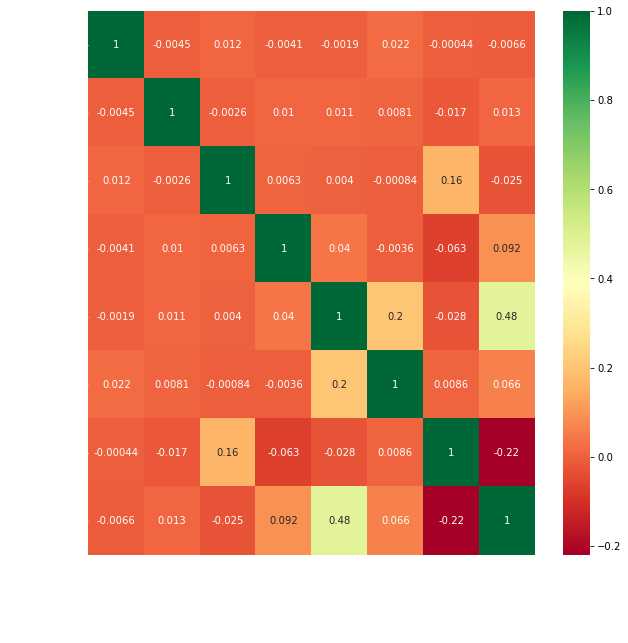

In [48]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
corrM = data.corr()
 
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
#plot heat map
g=sns.heatmap(corrM,annot=True,cmap="RdYlGn")

### From the correlation matrix it can be seen that Sales > Category > Quantity play significant role in determining Profit 

In [49]:
data.describe()
# [0:ShipModeCode,1:SegmentCode,2:StateCode,3:CategoryCode,4:Sales,5:Quantity,6:Discount,7:Profit]

,ShipModeCode,SegmentCode,StateCode,CategoryCode,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2.235041,0.658995,22.343206,0.972584,229.858001,3.789574,0.156203,28.656896
std,1.100880,0.762622,15.504611,0.629544,623.245101,2.225110,0.206452,234.260108
min,0.000000,0.000000,0.000000,0.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2.000000,0.000000,4.000000,1.000000,17.280000,2.000000,0.000000,1.728750
50%,3.000000,0.000000,27.000000,1.000000,54.490000,3.000000,0.200000,8.666500
75%,3.000000,1.000000,36.000000,1.000000,209.940000,5.000000,0.200000,29.364000
max,3.000000,2.000000,48.000000,2.000000,22638.480000,14.000000,0.800000,8399.976000


In [50]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn import preprocessing

X = data.drop(['Profit'],axis=1).values.tolist()
y = data['Profit'].values.tolist()

lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)


### Using K-Neighbour Classifier to identify important features and printing their importance scores

Feature: 0, Score: 0.02638
Feature: 1, Score: 0.01035
Feature: 2, Score: 0.18565
Feature: 3, Score: 0.00204
Feature: 4, Score: 0.24661
Feature: 5, Score: 0.08443
Feature: 6, Score: -0.00284


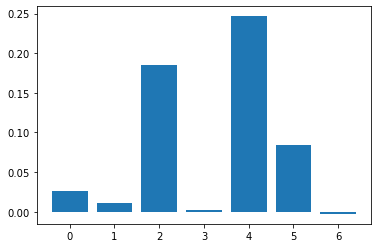

In [51]:
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Sales > State > Quantity impact Profit

### Using K-Neighbour Regressor to identify important features and printing their importance scores

Feature: 0, Score: 37280.17358
Feature: 1, Score: 4603.50915
Feature: 2, Score: 1490290.27448
Feature: 3, Score: 41328.75726
Feature: 4, Score: 3174507.83985
Feature: 5, Score: 264662.04900
Feature: 6, Score: 16613.72365


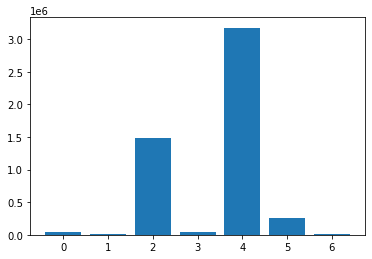

In [52]:

# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Sales > State > Quantity impact Profit

### Using Decision Tree Classifier to identify the important features

Feature: 0, Score: 0.01450
Feature: 1, Score: 0.02186
Feature: 2, Score: 0.04940
Feature: 3, Score: 0.04596
Feature: 4, Score: 0.76589
Feature: 5, Score: 0.04878
Feature: 6, Score: 0.05360


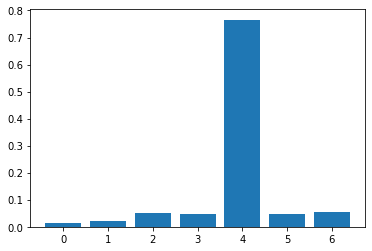

In [53]:

# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier(max_depth=10,max_features=6, min_samples_split=3, min_samples_leaf=2)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


# [0:ShipModeCode,1:SegmentCode,2:StateCode,3:CategoryCode,4:Sales,5:Quantity,6:Discount,7:Profit]

### Sales > Discount > State impact Profit

### Using Random Forest Classifier and Regressor to identify important features
#### The parameters of the models have been adjusted to avoid memory leaks and obtain reliable results

Feature: 0, Score: 0.00591
Feature: 1, Score: 0.00460
Feature: 2, Score: 0.01921
Feature: 3, Score: 0.03587
Feature: 4, Score: 0.44875
Feature: 5, Score: 0.02771
Feature: 6, Score: 0.45795


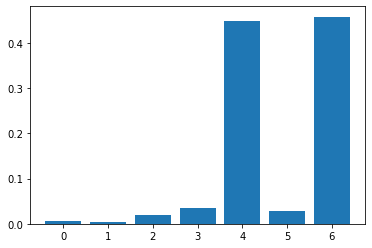

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
model = RandomForestRegressor(max_depth=10,max_features=6, min_samples_split=3, min_samples_leaf=2)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Analysis : Discount >= Sales > Category impact Profit

Feature: 0, Score: 0.00391
Feature: 1, Score: 0.00344
Feature: 2, Score: 0.00979
Feature: 3, Score: 0.00606
Feature: 4, Score: 0.91756
Feature: 5, Score: 0.03341
Feature: 6, Score: 0.02583


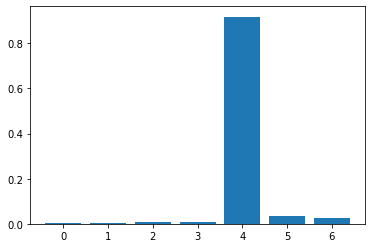

In [55]:
model = RandomForestClassifier(max_depth=4,max_features=6, min_samples_split=2, min_samples_leaf=2)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Analysis: Sales >> Discount >= Quantity for Profit Impact

### Conclusion: From the constructed models it can be inferred that the following attributes: Sales, Discount and State affect Profit the most.

In [56]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Plotting the regional states on which the company can direct its efforts to increase profits

In [57]:
import folium
map=folium.Map(location=[37.0902,-95.7129],zoom_start=5)
states=pd.read_csv('statelatlong.csv')
states.head()

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California


In [58]:
latitude = 20.0902
longitude = -80.7129
map = folium.Map(location=[latitude, longitude], zoom_start=4.2)

#Red colour for locations with loss and green for locations with profit.
def color(temp):
  if temp>0:
    return 'blue'
  else:
    return 'red'

for city in states['City']:
  profit=df.loc[df['State'] == city, 'Profit'].sum()
  folium.Marker([states.loc[states['City']==city,'Latitude'].iloc[0],states.loc[states['City']==city,'Longitude'].iloc[0]],
                folium.Popup(profit),
                icon=folium.Icon(color=color(profit))).add_to(map)

In [59]:
map

### From the map it can be observed that states in the East and the South have been facing losses and therefore the company can increase Profits by managing the Sales and Discount in these regions

## Task Completed